In [0]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!kaggle datasets download -d slothkong/10-monkey-species

 98% 537M/547M [00:06<00:00, 84.6MB/s]
100% 547M/547M [00:06<00:00, 83.0MB/s]


In [0]:
!unzip 10-monkey-species  -d  Dataset  

Archive:  10-monkey-species.zip
  inflating: Dataset/monkey_labels.txt  
  inflating: Dataset/training/training/n0/n0018.jpg  
  inflating: Dataset/training/training/n0/n0019.jpg  
  inflating: Dataset/training/training/n0/n0020.jpg  
  inflating: Dataset/training/training/n0/n0021.jpg  
  inflating: Dataset/training/training/n0/n0022.jpg  
  inflating: Dataset/training/training/n0/n0023.jpg  
  inflating: Dataset/training/training/n0/n0024.jpg  
  inflating: Dataset/training/training/n0/n0025.jpg  
  inflating: Dataset/training/training/n0/n0026.jpg  
  inflating: Dataset/training/training/n0/n0027.jpg  
  inflating: Dataset/training/training/n0/n0028.jpg  
  inflating: Dataset/training/training/n0/n0029.jpg  
  inflating: Dataset/training/training/n0/n0030.jpg  
  inflating: Dataset/training/training/n0/n0031.jpg  
  inflating: Dataset/training/training/n0/n0032.jpg  
  inflating: Dataset/training/training/n0/n0033.jpg  
  inflating: Dataset/training/training/n0/n0034.jpg  
  inflati

In [0]:
'[import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [0]:
pre_trained_model=MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(160,160,3)
)

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
for layers in pre_trained_model.layers:
  layers.trainable=False

In [0]:
last_layer=pre_trained_model.get_layer('out_relu')

last_output = last_layer.output

In [0]:
from tensorflow.keras import Model

from tensorflow.keras import layers

In [0]:
global_average_layer=layers.GlobalAveragePooling2D()
x=global_average_layer(last_output)

x=layers.Dense(64,activation=tf.nn.relu)(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(32,activation=tf.nn.relu)(x)






x=layers.Dense(10,activation=tf.nn.softmax)(x)
model=Model(pre_trained_model.input,x)

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255.0 )
train_generator=train_datagen.flow_from_directory(
    'Dataset/training/training',
     batch_size=18,
    target_size=(160,160),
    class_mode='categorical',
    
    shuffle=True,
    
    
)

validation_generator = train_datagen.flow_from_directory( 'Dataset/validation/validation',
                                                          batch_size=16,
                                                          class_mode  = 'categorical',
                                                          shuffle=True,
                                                         
                                                          target_size = (160, 160))

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [0]:


save=tf.keras.callbacks.ModelCheckpoint(filepath='Checkpoint/weights',
                                                 save_weights_only=True,
                                                 save_freq='epoch',
                                                 mode='auto',
                                                 verbose=0)


history=model.fit(train_generator,validation_data=validation_generator,epochs=40,steps_per_epoch=61,validation_steps=17,callbacks=[save])

Epoch 1/40
61/61 [==============================] - 57s 936ms/step - loss: 2.0219 - accuracy: 0.2841 - val_loss: 1.6130 - val_accuracy: 0.5972
Epoch 2/40
61/61 [==============================] - 56s 915ms/step - loss: 1.4387 - accuracy: 0.5761 - val_loss: 1.1169 - val_accuracy: 0.7972
Epoch 3/40
61/61 [==============================] - 54s 889ms/step - loss: 1.0449 - accuracy: 0.7216 - val_loss: 0.7328 - val_accuracy: 0.8613
Epoch 4/40
61/61 [==============================] - 59s 960ms/step - loss: 0.7824 - accuracy: 0.8000 - val_loss: 0.5420 - val_accuracy: 0.8861
Epoch 5/40
61/61 [==============================] - 55s 894ms/step - loss: 0.5780 - accuracy: 0.8592 - val_loss: 0.3776 - val_accuracy: 0.9222
Epoch 6/40
61/61 [==============================] - 57s 931ms/step - loss: 0.4552 - accuracy: 0.8845 - val_loss: 0.3137 - val_accuracy: 0.9422
Epoch 7/40
61/61 [==============================] - 54s 879ms/step - loss: 0.3644 - accuracy: 0.9186 - val_loss: 0.2755 - val_accuracy: 0.9389

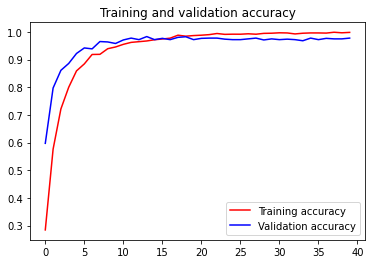

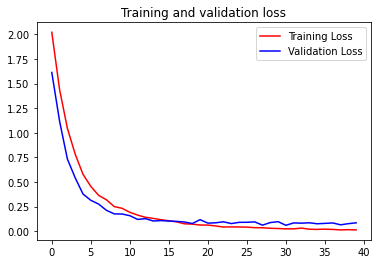

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
!mkdir Models

In [0]:
model.save('Models/Classifier')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Models/Classifier/assets


In [0]:
import tensorflow as tf

import numpy as np

from google.colab import files
from keras.preprocessing import image
dictionary={
    0:'alouatta_palliata aka mantled_howler',
    1:'erythrocebus_patas aka patas_monkey ',
    2:'cacajao_calvus aka bald_uakari',
    3:'macaca_fuscata aka  japanese_macaque ',
    4:'cebuella_pygmea aka pygmy_marmoset',
    5:'cebus_capucinus aka white_headed_capuchin',
    6:'mico_argentatus aka silvery_marmoset',
    7:'saimiri_sciureus	aka  common_squirrel_monkey',
    8:'aotus_nigriceps aka  black_headed_night_monkey',
    9:'trachypithecus_johnii , nilgiri_langur'


}
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(160, 160))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])/255.0
  
  classes = model.predict(images, batch_size=10)
  ""
  print(dictionary[np.argmax(classes[0])])
  

Saving 768ee65e-73c6-42b0-a5f0-96de10a4a7a0.jfif to 768ee65e-73c6-42b0-a5f0-96de10a4a7a0 (1).jfif
cacajao_calvus aka bald_uakari
